In [ ]:
%pip install -q pandas matplotlib scipy
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.axes import Axes
from dataclasses import dataclass, field
from typing import List
from matplotlib.ticker import MaxNLocator

ticks_million = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e6))
ticks_thousand = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e3))
ticks_comma = ticker.StrMethodFormatter('{x:,.0f}')

pd.options.display.max_rows = 999
pd.set_option('display.precision', 2)

COLOR_GO=(74/255, 171/255, 211/255)
COLOR_RUST=(229/255,89/255,40/255)
COLOR_UNSAFE=(132/255,41/255,35/255)

#BAR_COLORS=[COLOR_GO,'Navy',COLOR_RUST,'goldenrod',COLOR_UNSAFE]
BAR_COLORS=[COLOR_GO,COLOR_RUST,'goldenrod',COLOR_UNSAFE]
colors = {'go_main': 'Navy', 'go': COLOR_GO, 'unsafe': COLOR_UNSAFE, 'release': COLOR_RUST, 'nightly': 'goldenrod' }
markers = {'go_main': 'X', 'go': 'x', 'unsafe': 'v', 'release': '*', 'nightly': 'o' }
legends = {'go_main': 'Bolt Main', 'go': 'Bolt v1.3.8', 'unsafe': 'Bolt-rs Unsafe', 'release': 'Bolt-rs', 'nightly': 'Bolt-rs Nightly' }

@dataclass
class Plot:
    subplot: int
    title: str
    xlabel: str
    ylabel: str
    xlim: List[int] = field(default=None)
    ylim: List[int] = field(default=None)

    def configure(self, ax: Axes):
        ax.set_ylabel(self.ylabel)
        ax.set_xlabel(self.xlabel)
        ax.set_title(self.title)
        if self.xlim is not None:
            ax.set_xlim(self.xlim)
        if self.ylim is not None:
            ax.set_ylim(self.ylim)

comp = pd.read_csv('bbolt_comp.csv')

In [ ]:
runtimes = comp[comp.runtime.isin(["go","unsafe","release","nightly"])]

c100k = runtimes[runtimes['count']==100000]
c1m = runtimes[runtimes['count']==1000000]

                  0         1         2         3
write_alg       rnd  rnd-nest       seq  seq-nest
batch         10000     10000    100000     50000
release    112511.3   92443.5  562519.0  427775.7
go         107071.9   87892.8  295973.3  305376.4
imp            0.05      0.05       0.9       0.4


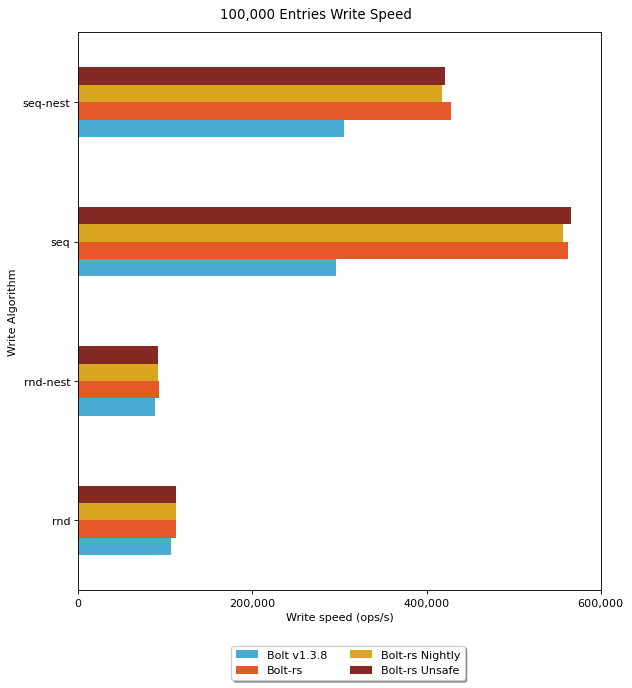

In [ ]:
alg = list()
batch = list()
release = list()
go = list()
go_main = list()
unsafe = list()
nightly = list()
imp = list()

for write_alg in pd.unique(c100k['write_alg']):
    g=c100k[c100k['write_alg']==write_alg].groupby(["runtime","batch"])["write_ops/s"].mean()
    maxed=g['go'].idxmax()
    alg.append(write_alg)
    batch.append(maxed)
    release.append(g['release'][maxed])
    go.append(g['go'][maxed])
    #go_main.append(g['go_main'][maxed])
    unsafe.append(g['unsafe'][maxed])
    nightly.append(g['nightly'][maxed])
    imp.append((g['release'][maxed]/g['go'][maxed])-1)
    
d = {
    'write_alg': alg,
    'go': go,
    #'go_main': go_main,
    'release': release,
    'nightly': nightly,
    'unsafe': unsafe,
}

i = {
    'write_alg': alg,
    'batch': batch,
    'release': release,
    'go': go,
    'imp': imp
}

df=pd.DataFrame(data=d)
idf=pd.DataFrame(data=i)
print(idf.T.round(2))
df.sort_values('write_alg',inplace=True)
fig = plt.figure(figsize=(8,8), dpi=80)
fig.suptitle('100,000 Entries Write Speed')
ax = fig.add_subplot(111)
df.plot.barh(x='write_alg',color=BAR_COLORS,ax=ax)
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlabel('Write speed (ops/s)')
ax.set_xticks([0,200000,400000,600000])
ax.set_ylabel('Write Algorithm')
ax.get_legend().remove()
lines = [] 
labels = [] 
Line, Label = ax.get_legend_handles_labels()
lines.extend(Line) 
labels.extend([legends[x] for x in Label]) 
fig.legend(lines,labels,loc='lower center', bbox_to_anchor=(0.55, -0.08), fancybox=True, shadow=True, ncols=2)
fig.tight_layout()
plt.show()

                  0         1         2         3
write_alg       rnd  rnd-nest       seq  seq-nest
batch         50000     10000    250000    250000
release    116768.2   95847.7  651574.2  767554.5
go          89782.6   91458.8  454243.4  534464.9
imp             0.3      0.05      0.43      0.44


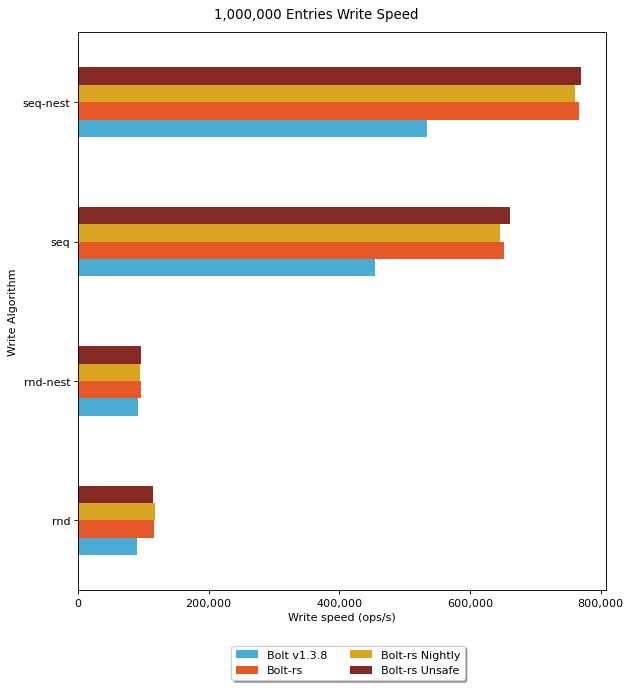

In [ ]:
alg = list()
batch = list()
go = list()
go_main = list()
release = list()
unsafe = list()
nightly = list()
imp = list()

for write_alg in pd.unique(c1m['write_alg']):
    g=c1m[c1m['write_alg']==write_alg].groupby(["runtime","batch"])["write_ops/s"].mean()
    maxed=g['go'].idxmax()
    alg.append(write_alg)
    batch.append(maxed)
    release.append(g['release'][maxed])
    go.append(g['go'][maxed])
    #go_main.append(g['go_main'][maxed])
    unsafe.append(g['unsafe'][maxed])
    nightly.append(g['nightly'][maxed])
    imp.append((g['release'][maxed]/g['go'][maxed])-1)

d = {
    'write_alg': alg,
    'go': go,
    #'go_main': go_main,
    'release': release,
    'nightly': nightly,
    'unsafe': unsafe,
}

i = {
    'write_alg': alg,
    'batch': batch,
    'release': release,
    'go': go,
    'imp': imp
}
df=pd.DataFrame(data=d)
idf=pd.DataFrame(data=i)
print(idf.T.round(2))
df.sort_values('write_alg',inplace=True)
fig = plt.figure(figsize=(8,8), dpi=80)
fig.suptitle('1,000,000 Entries Write Speed')
ax = fig.add_subplot(111)
df.plot.barh(x='write_alg',color=BAR_COLORS,ax=ax)
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlabel('Write speed (ops/s)')
ax.set_xticks([0,200000,400000,600000,800000])
ax.set_ylabel('Write Algorithm')
ax.get_legend().remove()
lines = [] 
labels = [] 
Line, Label = ax.get_legend_handles_labels() 
lines.extend(Line) 
labels.extend([legends[x] for x in Label]) 
fig.legend(lines,labels,loc='lower center', bbox_to_anchor=(0.55, -0.08), fancybox=True, shadow=True, ncols=2)
fig.tight_layout()
plt.show()

                  1             3           5             7
alg         rnd/seq  rnd-nest/seq     seq/seq  seq-nest/seq
batch          5000         50000       10000        100000
release  58823529.0    61764705.0  55555555.0    61111110.2
go       55555555.0    51052631.2  52631578.0    52105262.4
imp            0.06          0.21        0.06          0.17
                 0             2          4             6
alg        rnd/rnd  rnd-nest/rnd    seq/rnd  seq-nest/rnd
batch         5000          5000       5000          5000
release  2245630.8     1718915.8  2082484.4     1725344.6
go        921206.0      854408.6   914588.0      859266.2
imp           1.44          1.01       1.28          1.01


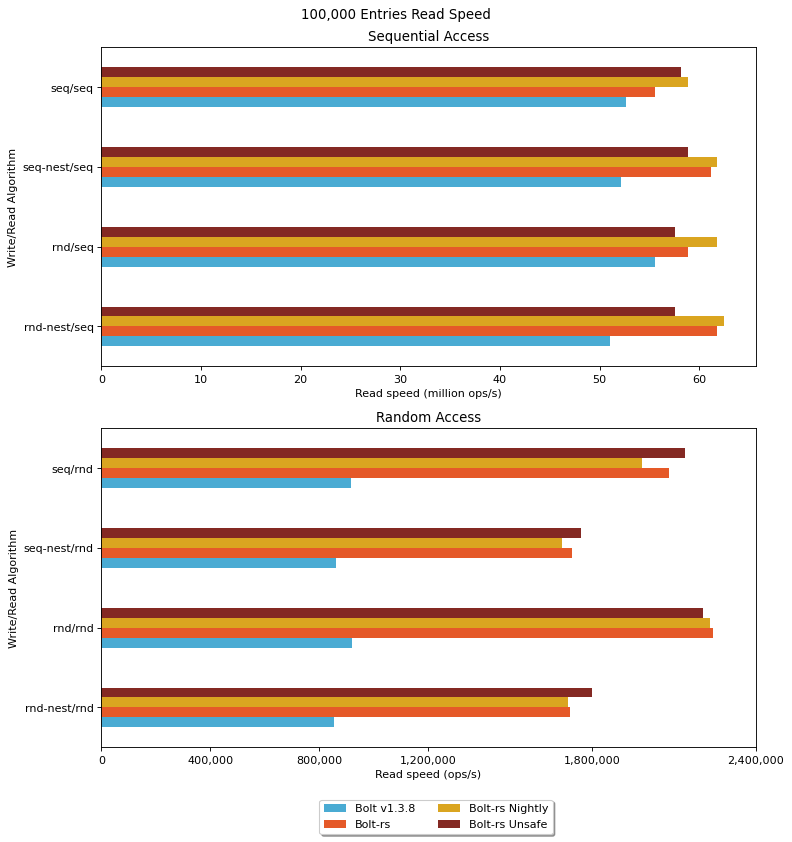

In [ ]:
alg = list()
batch = list()
go = list()
go_main = list()
release = list()
unsafe = list()
nightly = list()
imp = list()

for write_alg in pd.unique(c100k['write_alg']):
    for read_alg in pd.unique(c100k['read_alg']):
        g=c100k[c100k['write_alg']==write_alg].groupby(["read_alg","runtime","batch"])["read_ops/s"].mean()
        r = maxed=g[read_alg]
        maxed=r['go'].idxmax()
        alg.append(write_alg + '/' + read_alg)
        batch.append(maxed)
        release.append(r['release'][maxed])
        go.append(r['go'][maxed])
        #go_main.append(r['go_main'][maxed])
        unsafe.append(r['unsafe'][maxed])
        nightly.append(r['nightly'][maxed])
        imp.append((r['release'][maxed]/r['go'][maxed])-1)

d = {
    'alg': alg,
    'go': go,
    #'go_main': go_main,
    'release': release,
    'nightly': nightly,
    'unsafe': unsafe,
}

i = {
    'alg': alg,
    'batch': batch,
    'release': release,
    'go': go,
    'imp': imp
}

pd_rnd=pd.DataFrame(data=d)
idf=pd.DataFrame(data=i)
print(idf[idf['alg'].str.endswith('seq')].T.round(0))
print(idf[idf['alg'].str.endswith('rnd')].T.round(0))

pd_rnd.sort_values('alg',inplace=True)
fig = plt.figure(figsize=(10,10), dpi=80)
fig.suptitle('100,000 Entries Read Speed')
ax = fig.add_subplot(212)
pd_rnd[pd_rnd['alg'].str.endswith('rnd')].plot(kind='barh',x='alg',color=BAR_COLORS,ax=ax)
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_title('Random Access')
ax.set_xlabel('Read speed (ops/s)')
ax.set_xticks([0,400000,800000,1200000,1800000,2400000])
ax.set_ylabel('Write/Read Algorithm')
ax.get_legend().remove()
ax = fig.add_subplot(211)
pd_rnd[pd_rnd['alg'].str.endswith('seq')].plot(kind='barh',x='alg',color=BAR_COLORS,ax=ax)
ax.xaxis.set_major_formatter(ticks_million)
ax.set_title('Sequential Access')
ax.set_xlabel('Read speed (million ops/s)')
ax.set_ylabel('Write/Read Algorithm')
ax.get_legend().remove()
lines = [] 
labels = [] 
Line, Label = ax.get_legend_handles_labels() 
lines.extend(Line) 
labels.extend([legends[x] for x in Label]) 
fig.legend(lines,labels,loc='lower center', bbox_to_anchor=(0.55, -0.06), fancybox=True, shadow=True, ncols=2)
fig.tight_layout()
plt.show()

                  1             3           5             7
alg         rnd/seq  rnd-nest/seq     seq/seq  seq-nest/seq
batch          5000         50000       10000        100000
release  53801168.8    55555555.0  52631578.0    55555555.0
go       52631578.0    45454545.0  47619047.0    46753246.2
imp            0.02          0.22        0.11          0.19
                 0             2          4             6
alg        rnd/rnd  rnd-nest/rnd    seq/rnd  seq-nest/rnd
batch         5000          5000       5000          5000
release  1319270.6     1102783.6  1248927.6     1097127.0
go        706786.0      598243.4   677277.0      597967.2
imp           0.87          0.84       0.84          0.83


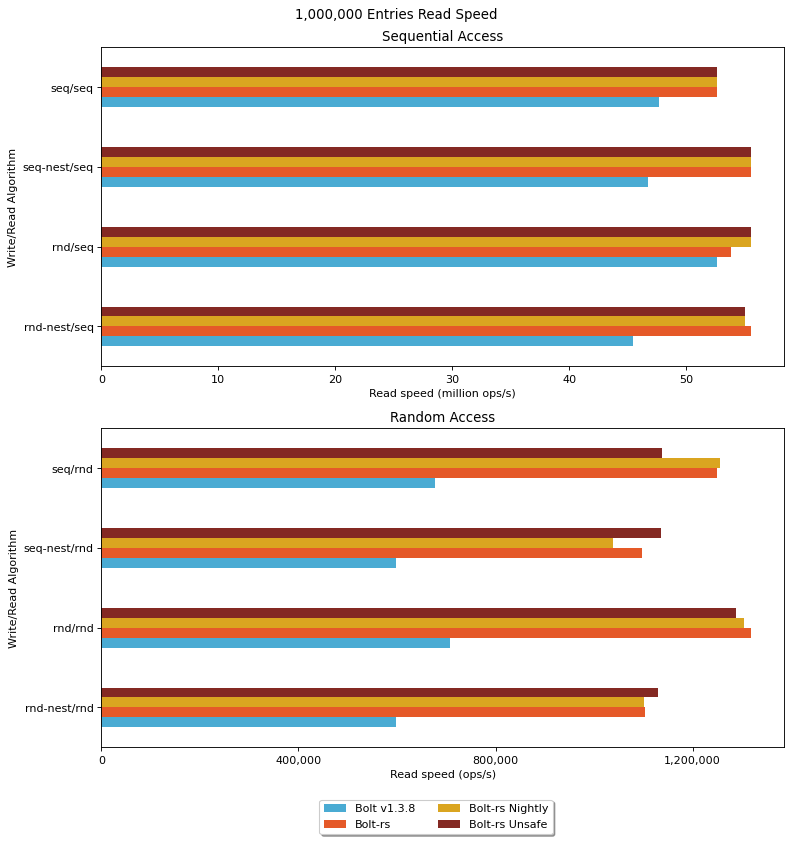

In [ ]:
alg = list()
batch_size = list()
go = list()
go_main = list()
release = list()
unsafe = list()
nightly = list()
imp = list()

for write_alg in pd.unique(c1m['write_alg']):
    for read_alg in pd.unique(c1m['read_alg']):
        g=c1m[c1m['write_alg']==write_alg].groupby(["read_alg","runtime","batch"])["read_ops/s"].mean()
        r = maxed=g[read_alg]
        maxed=r['go'].idxmax()
        alg.append(write_alg + '/' + read_alg)
        batch_size.append(maxed)
        release.append(r['release'][maxed])
        go.append(r['go'][maxed])
        #go_main.append(r['go_main'][maxed])
        unsafe.append(r['unsafe'][maxed])
        nightly.append(r['nightly'][maxed])
        imp.append((r['release'][maxed]/r['go'][maxed])-1)

d = {
    'alg': alg,
    'go': go,
    #'go_main': go_main,
    'release': release,
    'nightly': nightly,
    'unsafe': unsafe,
}

i = {
    'alg': alg,
    'batch': batch,
    'release': release,
    'go': go,
    'imp': imp
}

idf=pd.DataFrame(data=i)
print(idf[idf['alg'].str.endswith('seq')].T.round(2))
print(idf[idf['alg'].str.endswith('rnd')].T.round(2))

pd_rnd=pd.DataFrame(data=d)
pd_rnd.sort_values('alg',inplace=True)
fig = plt.figure(figsize=(10,10), dpi=80)
fig.suptitle('1,000,000 Entries Read Speed')
ax = fig.add_subplot(212)
pd_rnd[pd_rnd['alg'].str.endswith('rnd')].plot(kind='barh',x='alg',color=BAR_COLORS,ax=ax)
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_title('Random Access')
ax.set_xlabel('Read speed (ops/s)')
ax.set_xticks([0,400000,800000,1200000])
ax.set_ylabel('Write/Read Algorithm')
ax.get_legend().remove()
ax = fig.add_subplot(211)
pd_rnd[pd_rnd['alg'].str.endswith('seq')].plot(kind='barh',x='alg',color=BAR_COLORS,ax=ax)
ax.xaxis.set_major_formatter(ticks_million)
ax.set_title('Sequential Access')
ax.set_xlabel('Read speed (million ops/s)')
ax.set_ylabel('Write/Read Algorithm')
ax.get_legend().remove()
lines = [] 
labels = [] 
Line, Label = ax.get_legend_handles_labels() 
lines.extend(Line) 
labels.extend([legends[x] for x in Label]) 
fig.legend(lines,labels,loc='lower center', bbox_to_anchor=(0.55, -0.06), fancybox=True, shadow=True, ncols=2)
fig.tight_layout()
plt.show()

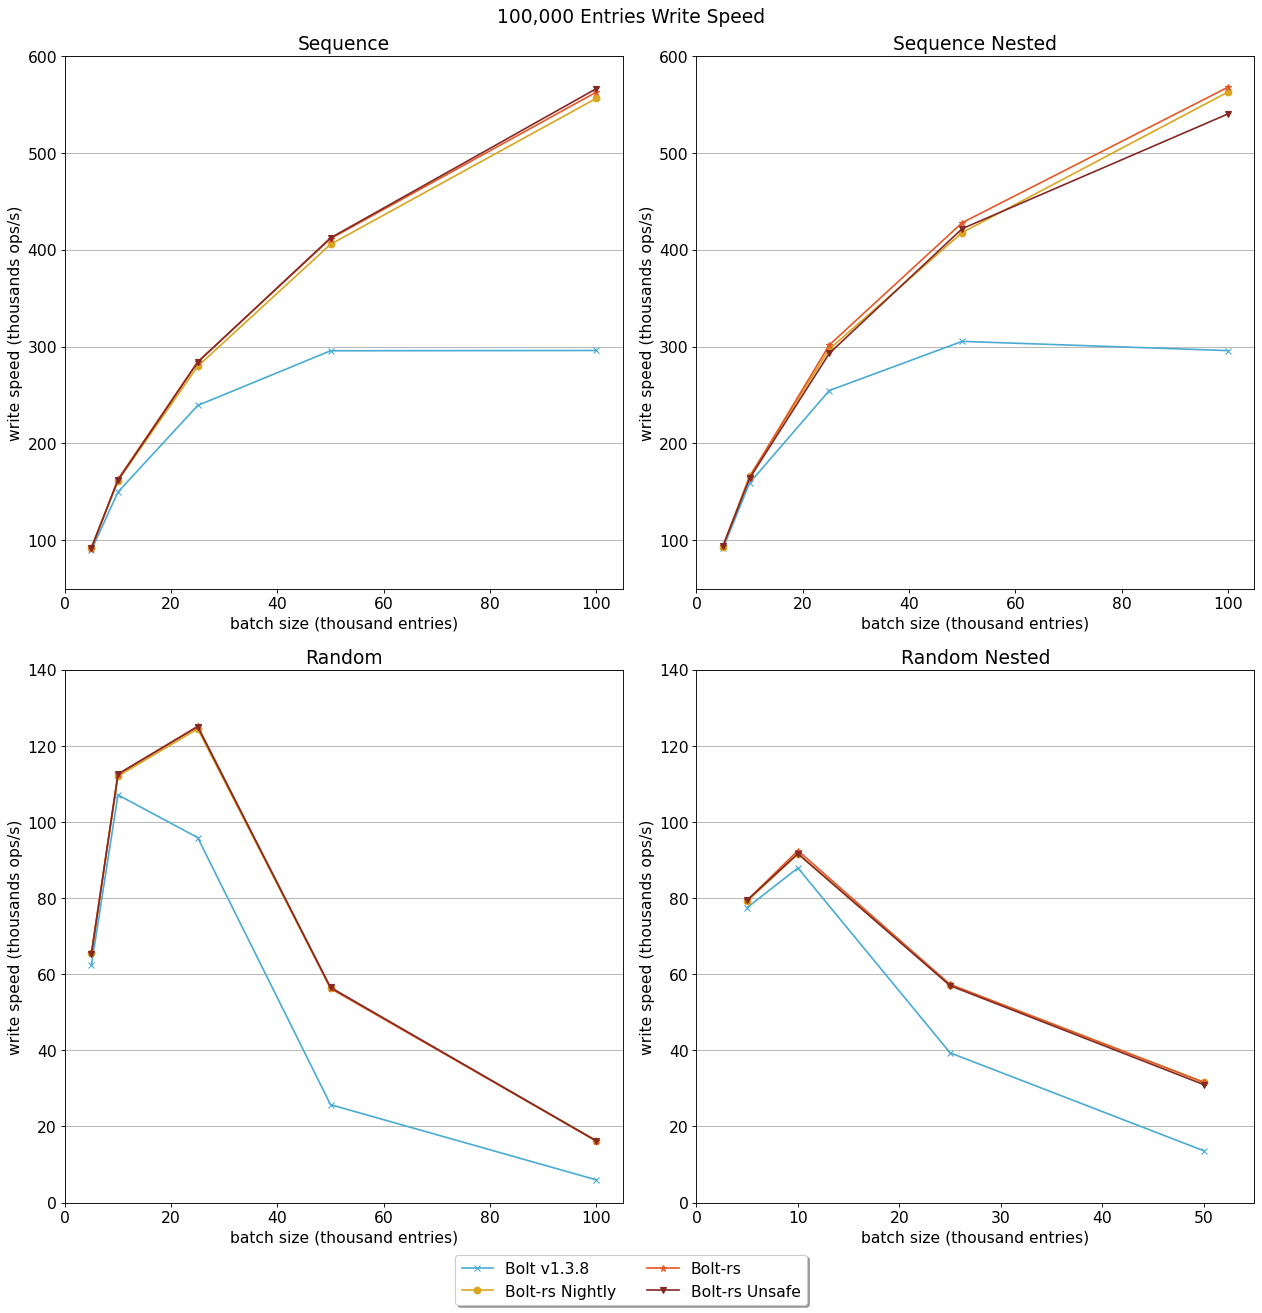

In [ ]:
plots={
    'seq': Plot(221,'Sequence','batch size (thousand entries)','write speed (thousands ops/s)',[0,105000],[50000,600000]),
    'seq-nest': Plot(222,'Sequence Nested','batch size (thousand entries)','write speed (thousands ops/s)',[0,105000],[50000,600000]),
    'rnd': Plot(223,'Random','batch size (thousand entries)','write speed (thousands ops/s)',[0,105000],[0,140000]),
    'rnd-nest': Plot(224,'Random Nested','batch size (thousand entries)','write speed (thousands ops/s)',[0,55000],[0,140000])
}
plt.rcParams["font.size"] = "14"
fig = plt.figure(figsize=(16, 16), dpi=80)
for write_alg in pd.unique(c100k['write_alg']):
    p = plots[write_alg]
    ax = fig.add_subplot(p.subplot)
    for runtime,data in c100k[c100k['write_alg'] == write_alg].groupby('runtime'):
        d=data.filter(['batch','write_ops/s'])
        #d.plot(kind='scatter',x='batch',y='write_ops/s',label=runtime,color=colors[runtime],ax=ax)
        m=d.groupby('batch')['write_ops/s'].mean()
        m.plot(ax=ax,color=colors[runtime],label=runtime,marker=markers[runtime])
    ax.yaxis.set_major_formatter(ticks_thousand)
    ax.xaxis.set_major_formatter(ticks_thousand)
    ax.grid(axis='y')
    p.configure(ax)

lines = [] 
labels = [] 
Line, Label = plt.gca().get_legend_handles_labels() 
lines.extend(Line) 
labels.extend([legends[x] for x in Label]) 
fig.legend(lines,labels,loc='lower center', bbox_to_anchor=(0.5, -0.04), fancybox=True, shadow=True, ncols=2)
fig.suptitle('100,000 Entries Write Speed')
fig.tight_layout()
plt.show()

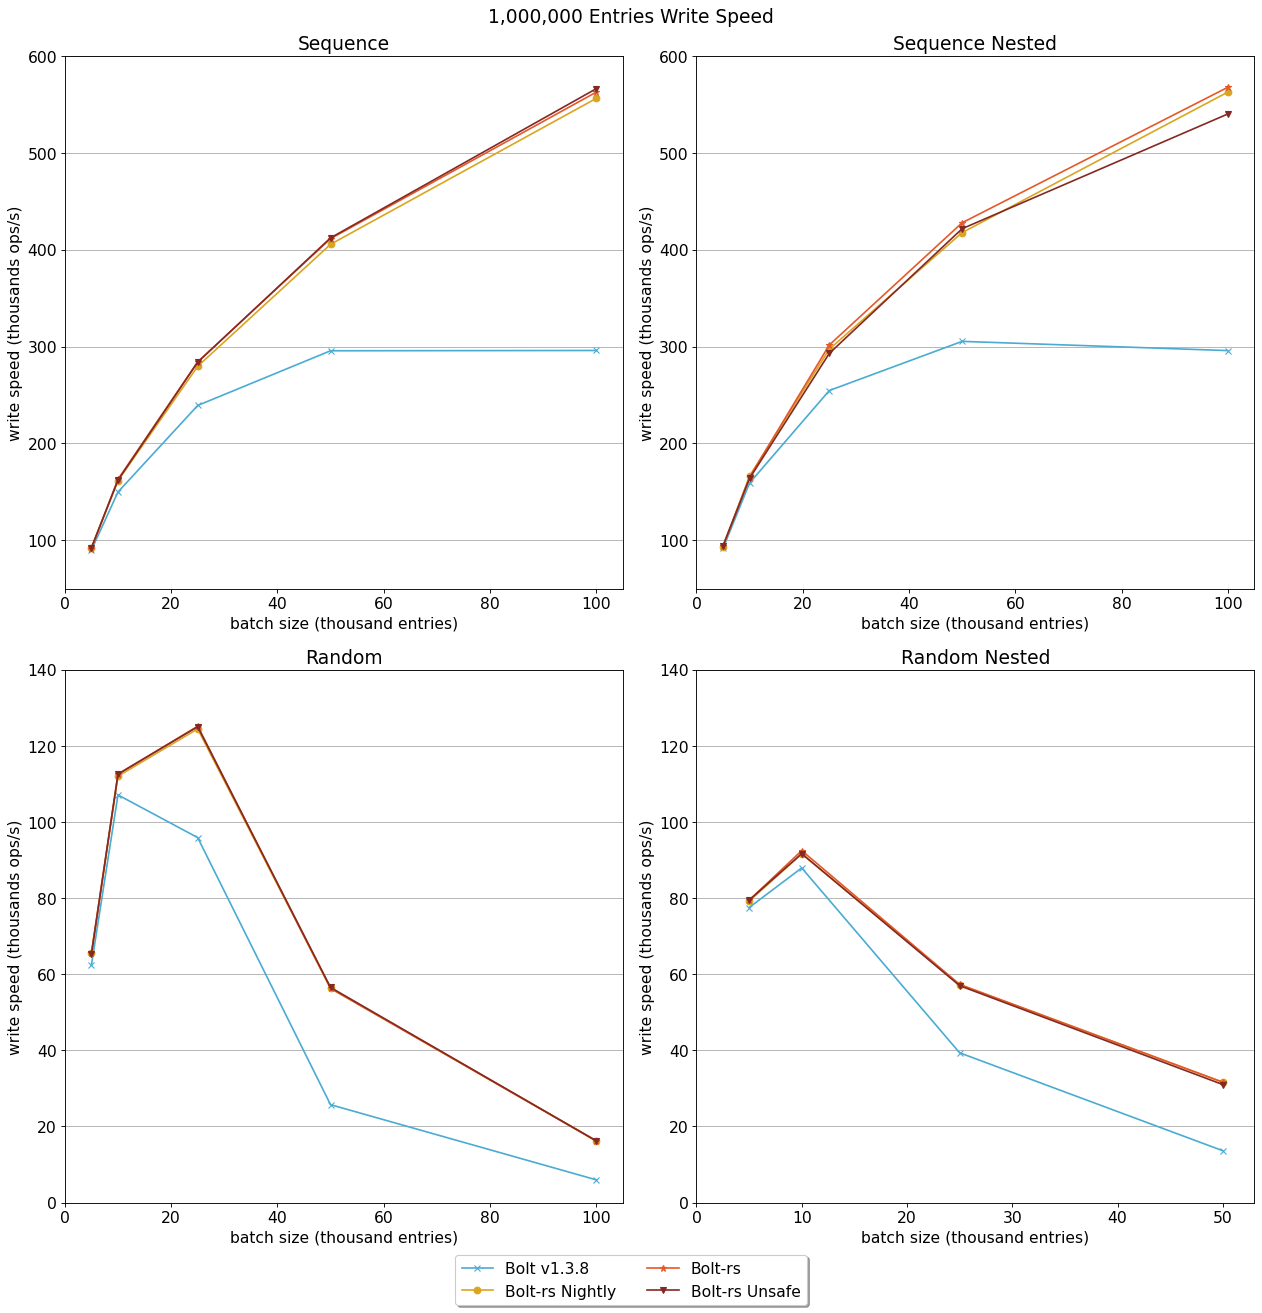

In [ ]:
plots={
    'seq': Plot(221,'Sequence','batch size (thousand entries)','write speed (thousands ops/s)',[0,105000],[50000,600000]),
    'seq-nest': Plot(222,'Sequence Nested','batch size (thousand entries)','write speed (thousands ops/s)',[0,105000],[50000,600000]),
    'rnd': Plot(223,'Random','batch size (thousand entries)','write speed (thousands ops/s)',[0,105000],[0,140000]),
    'rnd-nest': Plot(224,'Random Nested','batch size (thousand entries)','write speed (thousands ops/s)',[0,53000],[0,140000])
}
plt.rcParams["font.size"] = "14"
fig = plt.figure(figsize=(16, 16), dpi=80)
for write_alg in pd.unique(c1m['write_alg']):
    p = plots[write_alg]
    ax = fig.add_subplot(p.subplot)
    for runtime,data in c100k[c100k['write_alg'] == write_alg].groupby('runtime'):
        d=data.filter(['batch','write_ops/s'])
        #d.plot(kind='scatter',x='batch',y='write_ops/s',label=runtime,color=colors[runtime],ax=ax)
        m=d.groupby('batch')['write_ops/s'].mean()
        m.plot(color=colors[runtime],label=runtime,marker=markers[runtime])
    ax.yaxis.set_major_formatter(ticks_thousand)
    ax.xaxis.set_major_formatter(ticks_thousand)
    ax.grid(axis='y')
    p.configure(ax)
    
lines = [] 
labels = [] 
Line, Label = plt.gca().get_legend_handles_labels() 
lines.extend(Line) 
labels.extend([legends[x] for x in Label]) 
fig.legend(lines,labels,loc='lower center', bbox_to_anchor=(0.5, -0.04), fancybox=True, shadow=True, ncols=2)
fig.suptitle('1,000,000 Entries Write Speed')
fig.tight_layout()
plt.show()

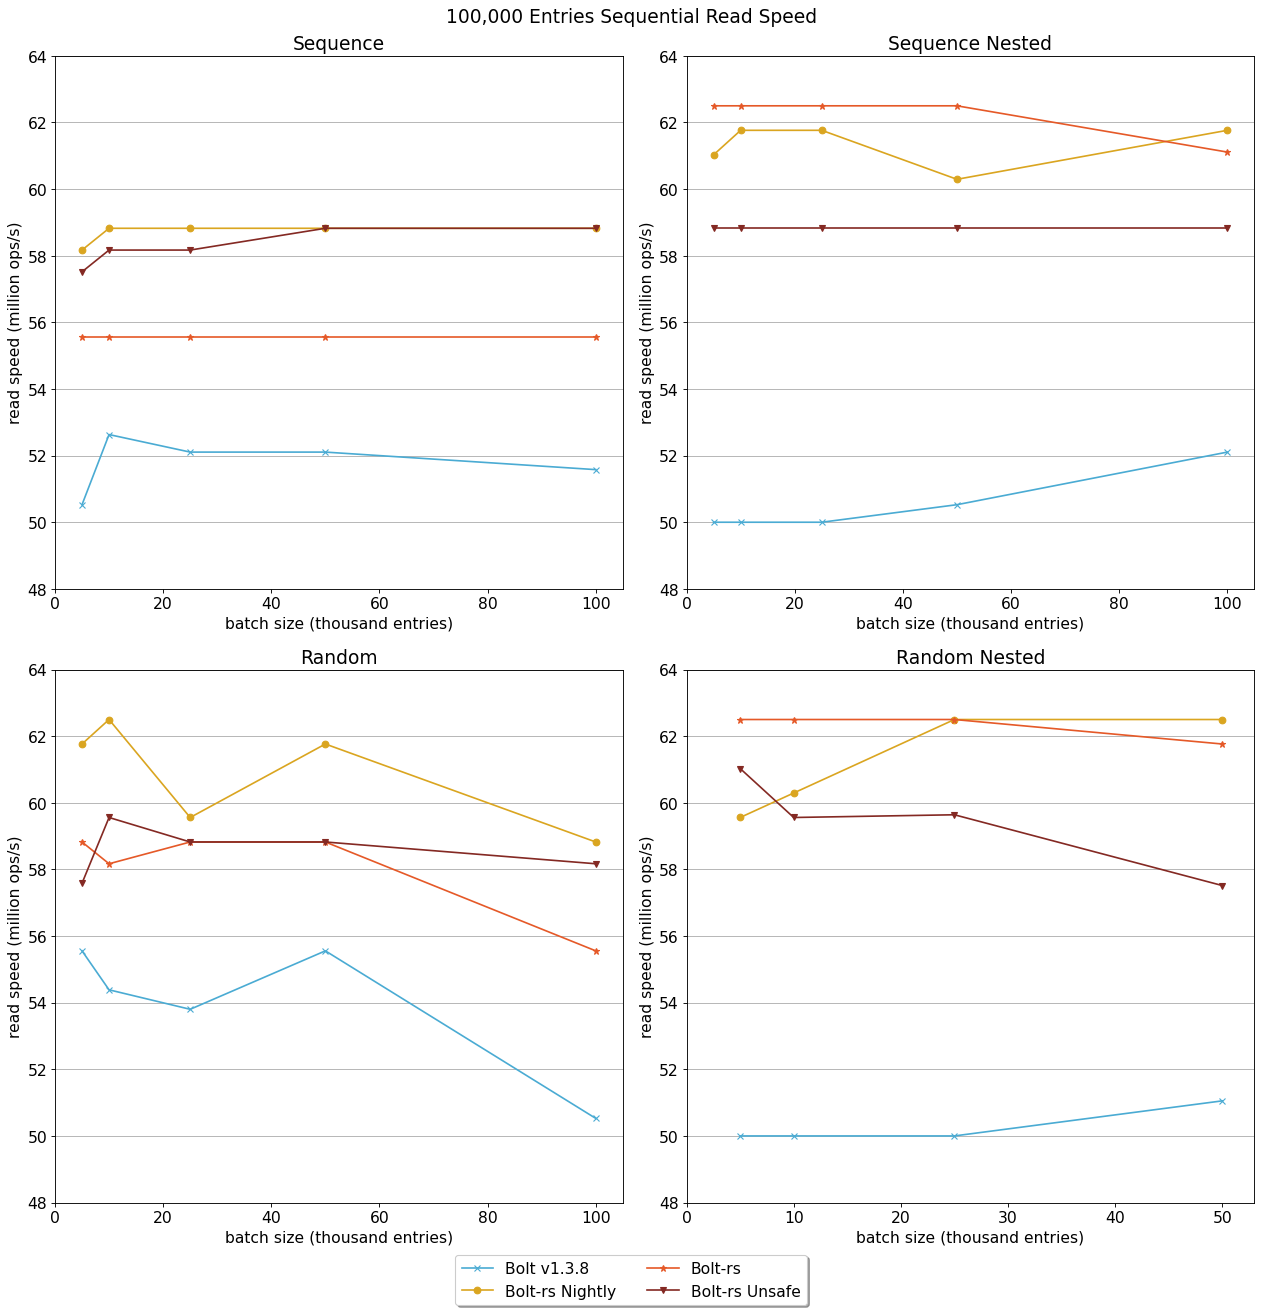

In [ ]:
plots={
    'seq': Plot(221,'Sequence','batch size (thousand entries)','read speed (million ops/s)',[0,105000],[48000000,64000000]),
    'seq-nest': Plot(222,'Sequence Nested','batch size (thousand entries)','read speed (million ops/s)',[0,105000],[48000000,64000000]),
    'rnd': Plot(223,'Random','batch size (thousand entries)','read speed (million ops/s)',[0,105000],[48000000,64000000]),
    'rnd-nest': Plot(224,'Random Nested','batch size (thousand entries)','read speed (million ops/s)',[0,53000],[48000000,64000000])
}
plt.rcParams["font.size"] = "14"
fig = plt.figure(figsize=(16, 16), dpi=80)
for write_alg in pd.unique(c100k['write_alg']):
    p = plots[write_alg]
    ax = fig.add_subplot(p.subplot)
    for runtime,data in c100k[(c100k['write_alg'] == write_alg) & (c100k['read_alg'] == 'seq')].groupby('runtime'):
        d=data.filter(['batch','read_ops/s'])
        #d.plot(kind='scatter',x='batch',y='write_ops/s',label=runtime,color=colors[runtime],ax=ax)
        m=d.groupby('batch')['read_ops/s'].mean()
        m.plot(ax=ax,color=colors[runtime],label=runtime,marker=markers[runtime])
    ax.yaxis.set_major_formatter(ticks_million)
    ax.xaxis.set_major_formatter(ticks_thousand)
    ax.grid(axis='y')
    p.configure(ax)
    
lines = [] 
labels = [] 
Line, Label = plt.gca().get_legend_handles_labels() 
lines.extend(Line) 
labels.extend([legends[x] for x in Label]) 
fig.legend(lines,labels,loc='lower center', bbox_to_anchor=(0.5, -0.04), fancybox=True, shadow=True, ncols=2)
fig.suptitle('100,000 Entries Sequential Read Speed')
fig.tight_layout()
plt.show()

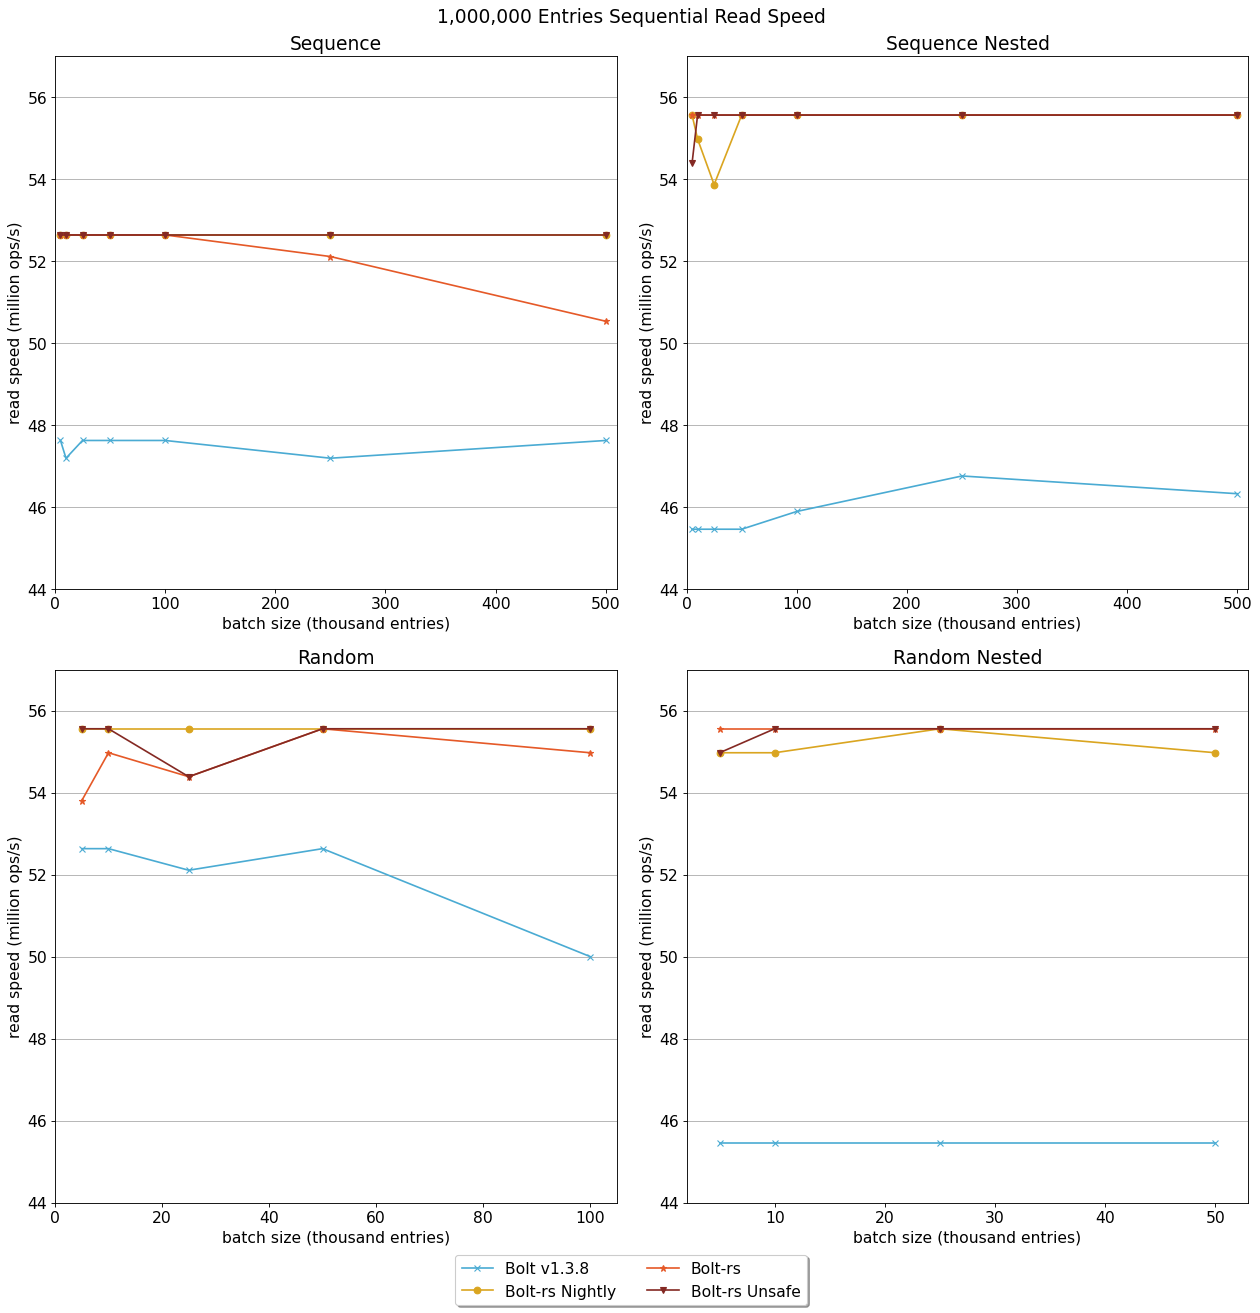

In [ ]:
plots={
    'seq': Plot(221,'Sequence','batch size (thousand entries)','read speed (million ops/s)',[0,510000],[44000000,57000000]),
    'seq-nest': Plot(222,'Sequence Nested','batch size (thousand entries)','read speed (million ops/s)',[0,510000],[44000000,57000000]),
    'rnd': Plot(223,'Random','batch size (thousand entries)','read speed (million ops/s)',[0,105000],[44000000,57000000]),
    'rnd-nest': Plot(224,'Random Nested','batch size (thousand entries)','read speed (million ops/s)',[2000,53000],[44000000,57000000])
}
plt.rcParams["font.size"] = "14"
fig = plt.figure(figsize=(16, 16), dpi=80)
for write_alg in pd.unique(c1m['write_alg']):
    p = plots[write_alg]
    ax = fig.add_subplot(p.subplot)
    for runtime,data in c1m[(c1m['write_alg'] == write_alg) & (c1m['read_alg'] == 'seq')].groupby('runtime'):
        d=data.filter(['batch','read_ops/s'])
        #d.plot(kind='scatter',x='batch',y='write_ops/s',label=runtime,color=colors[runtime],ax=ax)
        m=d.groupby('batch')['read_ops/s'].mean()
        m.plot(ax=ax,color=colors[runtime],label=runtime,marker=markers[runtime])
    ax.yaxis.set_major_formatter(ticks_million)
    ax.xaxis.set_major_formatter(ticks_thousand)
    ax.grid(axis='y')
    p.configure(ax)
    
lines = [] 
labels = [] 
Line, Label = plt.gca().get_legend_handles_labels() 
lines.extend(Line) 
labels.extend([legends[x] for x in Label]) 
fig.legend(lines,labels,loc='lower center', bbox_to_anchor=(0.5, -0.04), fancybox=True, shadow=True, ncols=2)
fig.suptitle('1,000,000 Entries Sequential Read Speed')
fig.tight_layout()
plt.show()

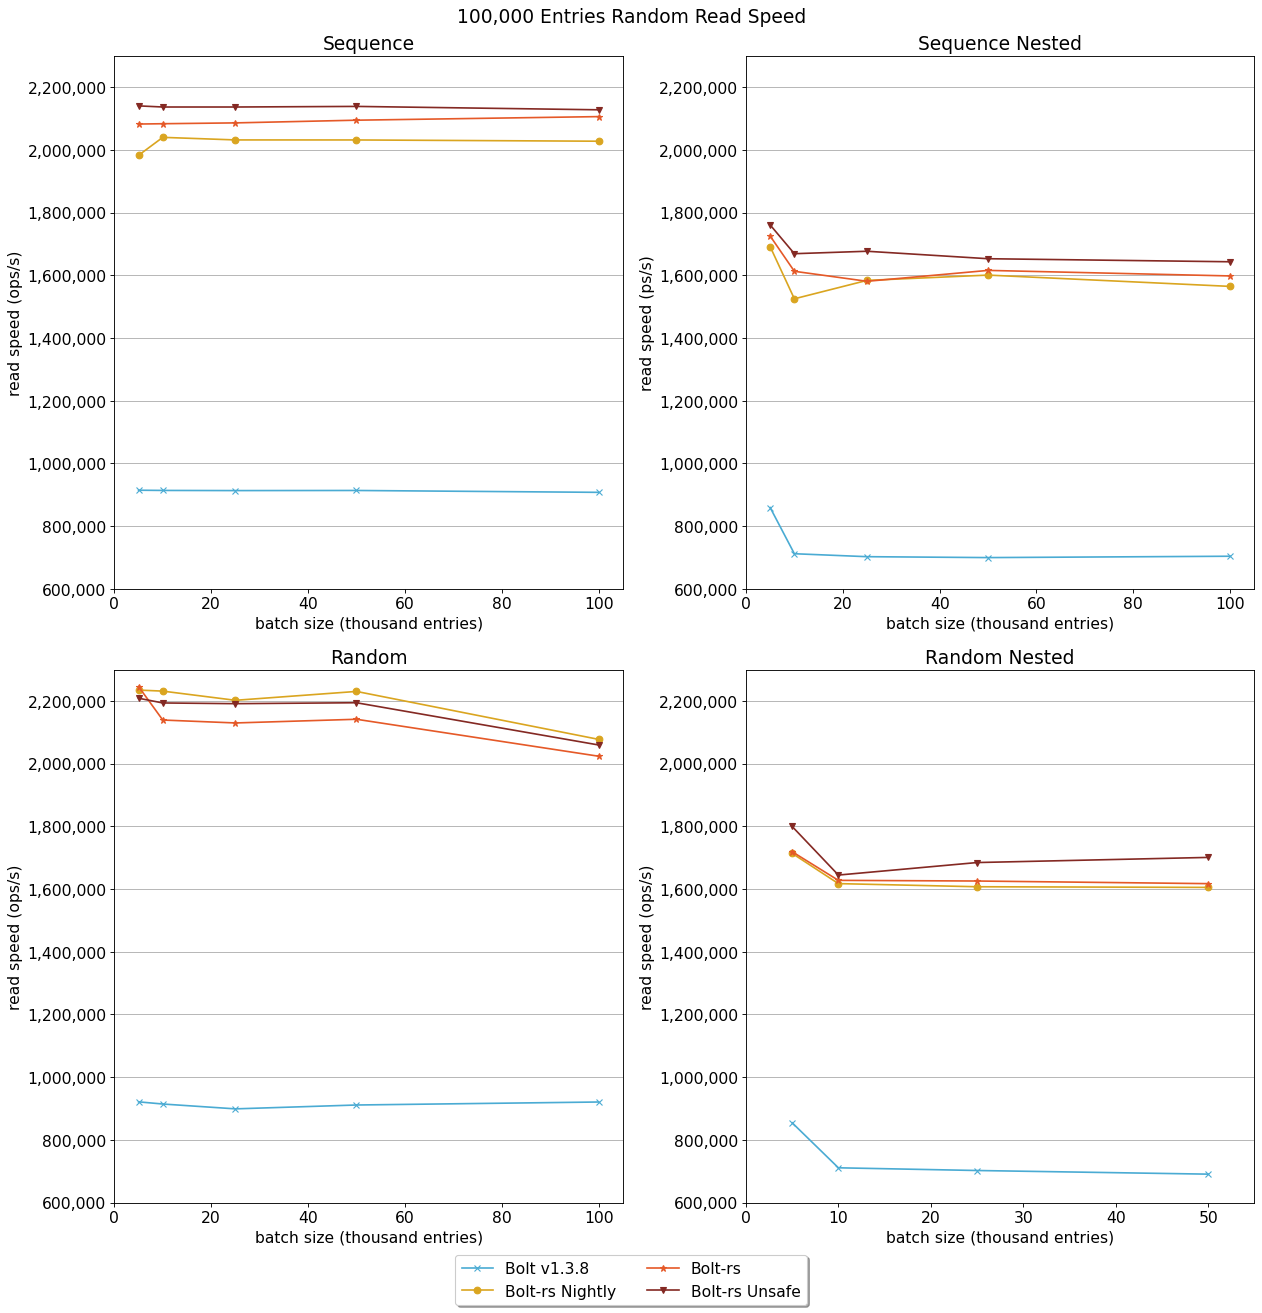

In [ ]:
plots={
    'seq': Plot(221,'Sequence','batch size (thousand entries)','read speed (ops/s)',[0,105000],[600000,2300000]),
    'seq-nest': Plot(222,'Sequence Nested','batch size (thousand entries)','read speed (ps/s)',[0,105000],[600000,2300000]),
    'rnd': Plot(223,'Random','batch size (thousand entries)','read speed (ops/s)',[0,105000],[600000,2300000]),
    'rnd-nest': Plot(224,'Random Nested','batch size (thousand entries)','read speed (ops/s)',[0,55000],[600000,2300000])
}
plt.rcParams["font.size"] = "14"
fig = plt.figure(figsize=(16, 16), dpi=80)
for write_alg in pd.unique(c100k['write_alg']):
    p = plots[write_alg]
    ax = fig.add_subplot(p.subplot)
    for runtime,data in c100k[(c100k['write_alg'] == write_alg) & (c100k['read_alg'] == 'rnd')].groupby('runtime'):
        d=data.filter(['batch','read_ops/s'])
        #d.plot(kind='scatter',x='batch',y='write_ops/s',label=runtime,color=colors[runtime],ax=ax)
        m=d.groupby('batch')['read_ops/s'].mean()
        m.plot(ax=ax,color=colors[runtime],label=runtime,marker=markers[runtime])
    ax.yaxis.set_major_formatter(ticks_comma)
    ax.xaxis.set_major_formatter(ticks_thousand)
    ax.grid(axis='y')
    p.configure(ax)
    
lines = [] 
labels = [] 
Line, Label = plt.gca().get_legend_handles_labels() 
lines.extend(Line) 
labels.extend([legends[x] for x in Label]) 
fig.legend(lines,labels,loc='lower center', bbox_to_anchor=(0.5, -0.04), fancybox=True, shadow=True, ncols=2)
fig.suptitle('100,000 Entries Random Read Speed')
fig.tight_layout()
plt.show()

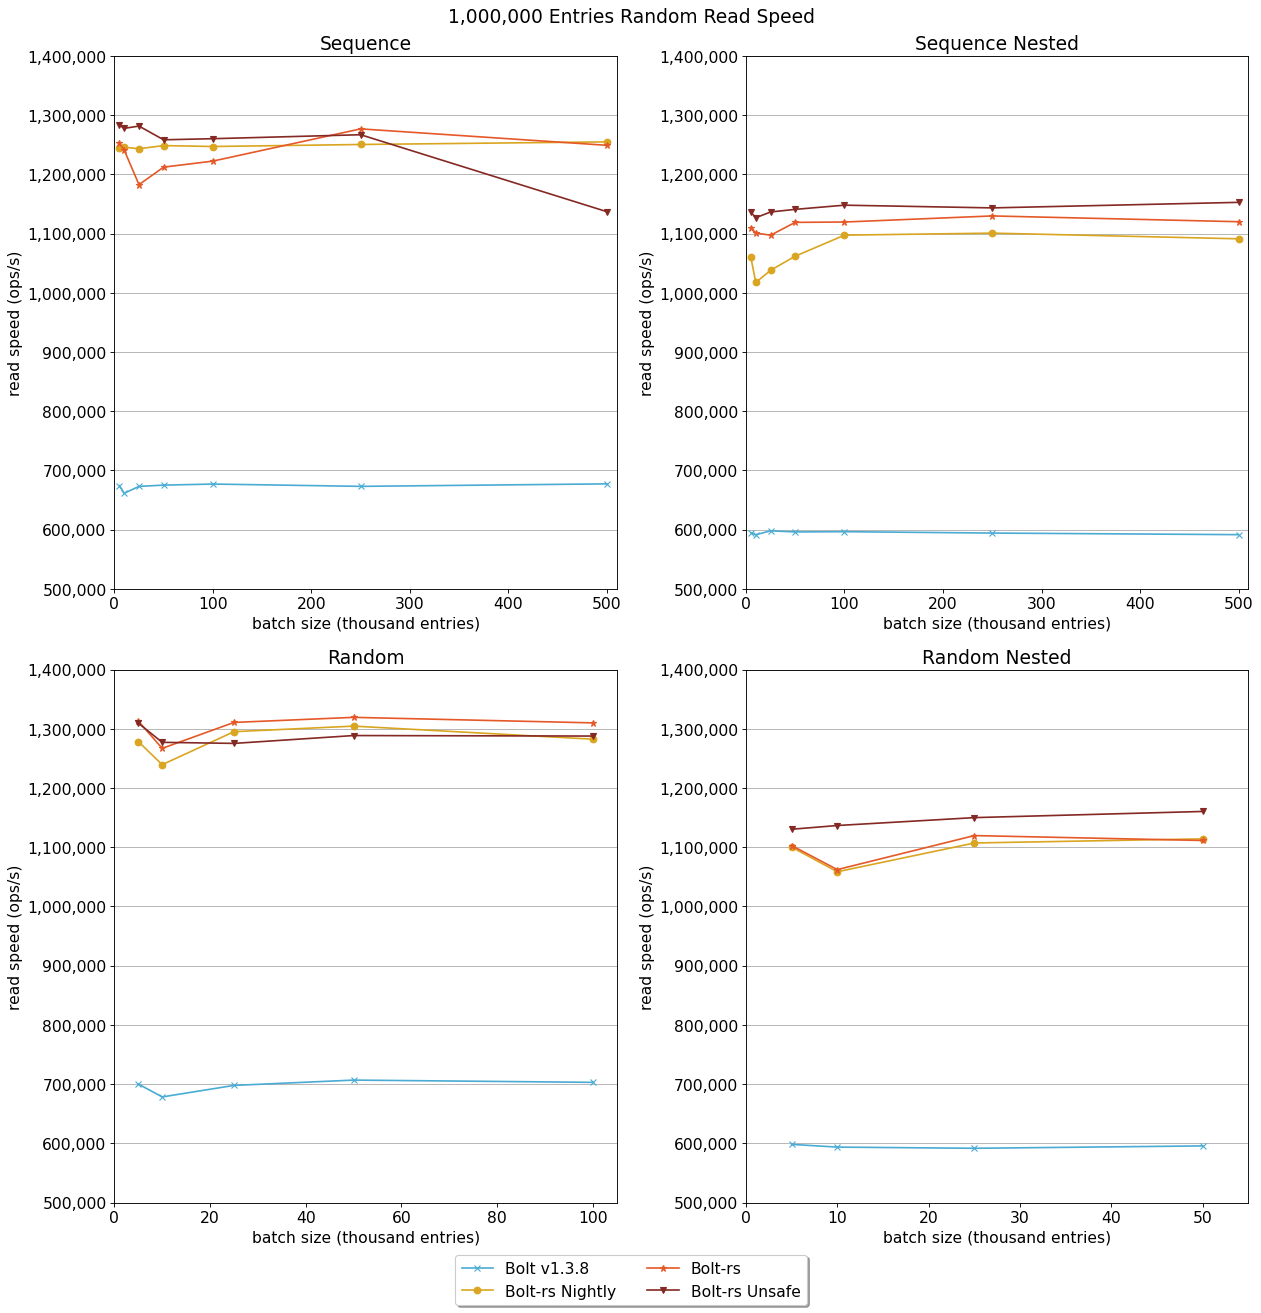

In [ ]:
plots={
    'seq': Plot(221,'Sequence','batch size (thousand entries)','read speed (ops/s)',[0,510000],[500000,1400000]),
    'seq-nest': Plot(222,'Sequence Nested','batch size (thousand entries)','read speed (ops/s)',[0,510000],[500000,1400000]),
    'rnd': Plot(223,'Random','batch size (thousand entries)','read speed (ops/s)',[0,105000],[500000,1400000]),
    'rnd-nest': Plot(224,'Random Nested','batch size (thousand entries)','read speed (ops/s)',[0,55000],[500000,1400000])
}
plt.rcParams["font.size"] = "14"
fig = plt.figure(figsize=(16, 16), dpi=80)
for write_alg in pd.unique(c1m['write_alg']):
    p = plots[write_alg]
    ax = fig.add_subplot(p.subplot)
    for runtime,data in c1m[(c1m['write_alg'] == write_alg) & (c1m['read_alg'] == 'rnd')].groupby('runtime'):
        d=data.filter(['batch','read_ops/s'])
        #d.plot(kind='scatter',x='batch',y='write_ops/s',label=runtime,color=colors[runtime],ax=ax)
        m=d.groupby('batch')['read_ops/s'].mean()
        m.plot(ax=ax,color=colors[runtime],label=runtime,marker=markers[runtime])
    ax.yaxis.set_major_formatter(ticks_comma)
    ax.xaxis.set_major_formatter(ticks_thousand)
    ax.grid(axis='y')
    p.configure(ax)
    
lines = [] 
labels = [] 
Line, Label = plt.gca().get_legend_handles_labels() 
lines.extend(Line) 
labels.extend([legends[x] for x in Label]) 
fig.legend(lines,labels,loc='lower center', bbox_to_anchor=(0.5, -0.04), fancybox=True, shadow=True, ncols=2)
fig.suptitle('1,000,000 Entries Random Read Speed')
fig.tight_layout()
plt.show()